# Exploratory Data Analysis

In this section of the notebook, I will be exploring the data and answering the following questions:

   1. Is there something intereseting to count?
   2. Are there any trends (e.g. high, low, increasing, decreasing, anomalies)?
   3. Are there any valuable comparisons between two related quantities?
  
I used histograms, bar plots, scatterplots, and time-series plots to answer the following questions:

   4. Are there any insights from the data?
   5. Are there any correlations? 
   6. What is a hypothesis that can be taken further?
   7. What other questions arise from these insights and correlations?
   
After answering these questions, I provide a link to a presentation that uses text and plots to tell the compelling story of my data.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import visualization as vz
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

file = 'rainfalldata.csv'
rd = pd.read_csv(file)
file2 = 'ncrainfalldata.csv'
ncrd = pd.read_csv(file2)

In [5]:
rd.head()

Date  Raleigh, NC  Greensboro, NC  Fayetteville, NC  Albemarle, NC  \
0  1980-01-01         4.39            4.00              3.77           4.87   
1  1980-02-01         1.91            1.77              1.77           0.84   
2  1980-03-01         5.87            5.04              5.93          11.39   
3  1980-04-01         1.97            3.24              3.61           3.49   
4  1980-05-01         2.33            3.23              1.77           5.14   

   Arcola, NC  Asheboro, NC  Burlington, NC  Carthage, NC  Chapel Hill, NC  \
0        4.01          4.65            4.43          4.95             4.08   
1        1.29          1.55            1.82          1.21             2.05   
2        5.59          6.33            5.69           NaN             6.28   
3        1.94          1.86            2.79           NaN             2.32   
4        2.24          4.36            3.86           NaN             4.50   

   ...   ROGERSVILLE 1 NE, TN  SODDY DAISY-MOWBRAY MTN, TN  SPRING CITY, TN  \
0  ...                   5.15                          NaN              NaN   
1  ...                   1.28                          NaN              NaN   
2  ...                   6.50                          NaN              NaN   
3  ...                   3.54                          NaN              NaN   
4  ...                   2.80                          NaN              NaN   

   TAZEWELL, TN   TOWNSEND 5S, TN   KING, NC  ABINGDON 3S, VA  WISE 1SE, VA  \
0          6.06               NaN        NaN             4.22           NaN   
1          2.43               NaN        NaN             1.48          1.15   
2          7.51               NaN        NaN             5.84          4.32   
3          3.37               NaN        NaN             3.51          4.03   
4          3.79               NaN        NaN             4.08          2.88   

   John Kerr Dam, VA  Emporia, VA  
0               4.76         5.34  
1               1.45         1.27  
2               4.02         3.24  
3               3.24         2.73  
4               4.01         4.66  

[5 rows x 235 columns]

In [83]:
rd.Date = pd.to_datetime(rd.Date)
rd = rd.set_index('Date')

In [ ]:
#I need to place Greensboro next to Raleigh to compare next to each other, might be able to do like 5 locations at a time. 

[1.625533566248326, 1.4366320664442713, 1.5010542844426882, 1.6780322076300416, 1.5114579933990984, 2.2981824733419263, 2.200236639509775, 2.2593487312370355, 3.4316473929703237, 1.942733195087207, 2.086511637592037, 1.4638976816268998]


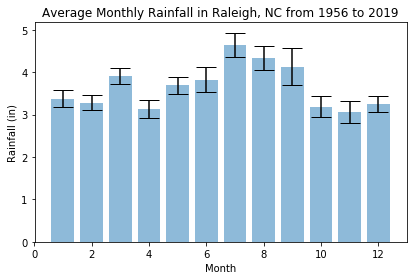

In [5]:
monthavg = []
monthsem = []
monthstd = []
for i in range(1,13):
    monthavg.append(np.mean(rd['Raleigh, NC'][rd.index.month == i]))
    monthsem.append(stats.sem(rd['Raleigh, NC'][rd.index.month == i]))
    monthstd.append(np.std(rd['Raleigh, NC'][rd.index.month == i]))
print(monthstd)
    
fig, ax = plt.subplots()
ax.bar(rd.index.month.unique(), monthavg, yerr = monthsem, alpha=0.5, ecolor='black', capsize=10)
ax.set_title('Average Monthly Rainfall in Raleigh, NC from 1956 to 2019')
ax.set_xlabel('Month')
ax.set_ylabel('Rainfall (in)')
plt.tight_layout()
plt.savefig('raleighmonthly.jpg')
plt.show()

#error bars indicate SEM

AttributeError: Unknown property figsize

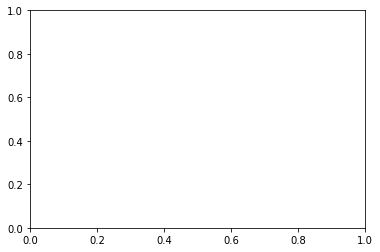

In [11]:
monthavggr = []
monthsemgr = []
for i in range(1,13):
    monthavggr.append(np.mean(rd['Greensboro, NC'][rd.index.month == i]))
    monthsemgr.append(stats.sem(rd['Greensboro, NC'][rd.index.month == i]))
    

fig2, ax2 = plt.subplots()
ax2.bar(rd.index.month.unique(), monthavggr, yerr = monthsemgr, alpha=0.5, ecolor='black', capsize=10)
ax2.set_title('Average Monthly Rainfall in Greensboro, NC from 1956 to 2019')
ax2.set_xlabel('Month')
ax2.set_ylabel('Rainfall (in)')
plt.tight_layout()
plt.savefig('greensboromonthly.jpg')
plt.show()

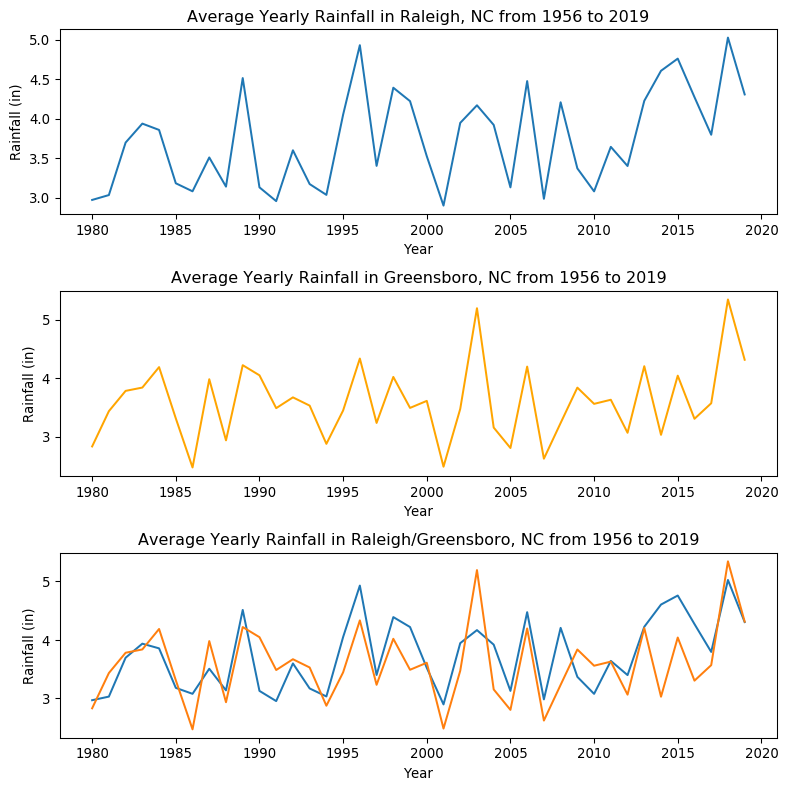

In [28]:
rdyearavg = rd.resample('Y').mean()
plt.figure(figsize = (800/96, 800/96),dpi=96)
plt.subplot(3,1,1)
plt.plot(rdyearavg.index.year, rdyearavg['Raleigh, NC'])
plt.title('Average Yearly Rainfall in Raleigh, NC from 1956 to 2019')
plt.xlabel('Year')
plt.ylabel('Rainfall (in)')

plt.subplot(3,1,2)
plt.plot(rdyearavg.index.year, rdyearavg['Greensboro, NC'], color = 'orange')
plt.title('Average Yearly Rainfall in Greensboro, NC from 1956 to 2019')
plt.xlabel('Year')
plt.ylabel('Rainfall (in)')

plt.subplot(3,1,3)
plt.plot(rdyearavg.index.year, rdyearavg['Raleigh, NC'])
plt.plot(rdyearavg.index.year, rdyearavg['Greensboro, NC'])
plt.title('Average Yearly Rainfall in Raleigh/Greensboro, NC from 1956 to 2019')
plt.xlabel('Year')
plt.ylabel('Rainfall (in)')
plt.tight_layout()

plt.savefig('yearcompRalGre.jpg')
plt.show()

## Seasonal Decomposition

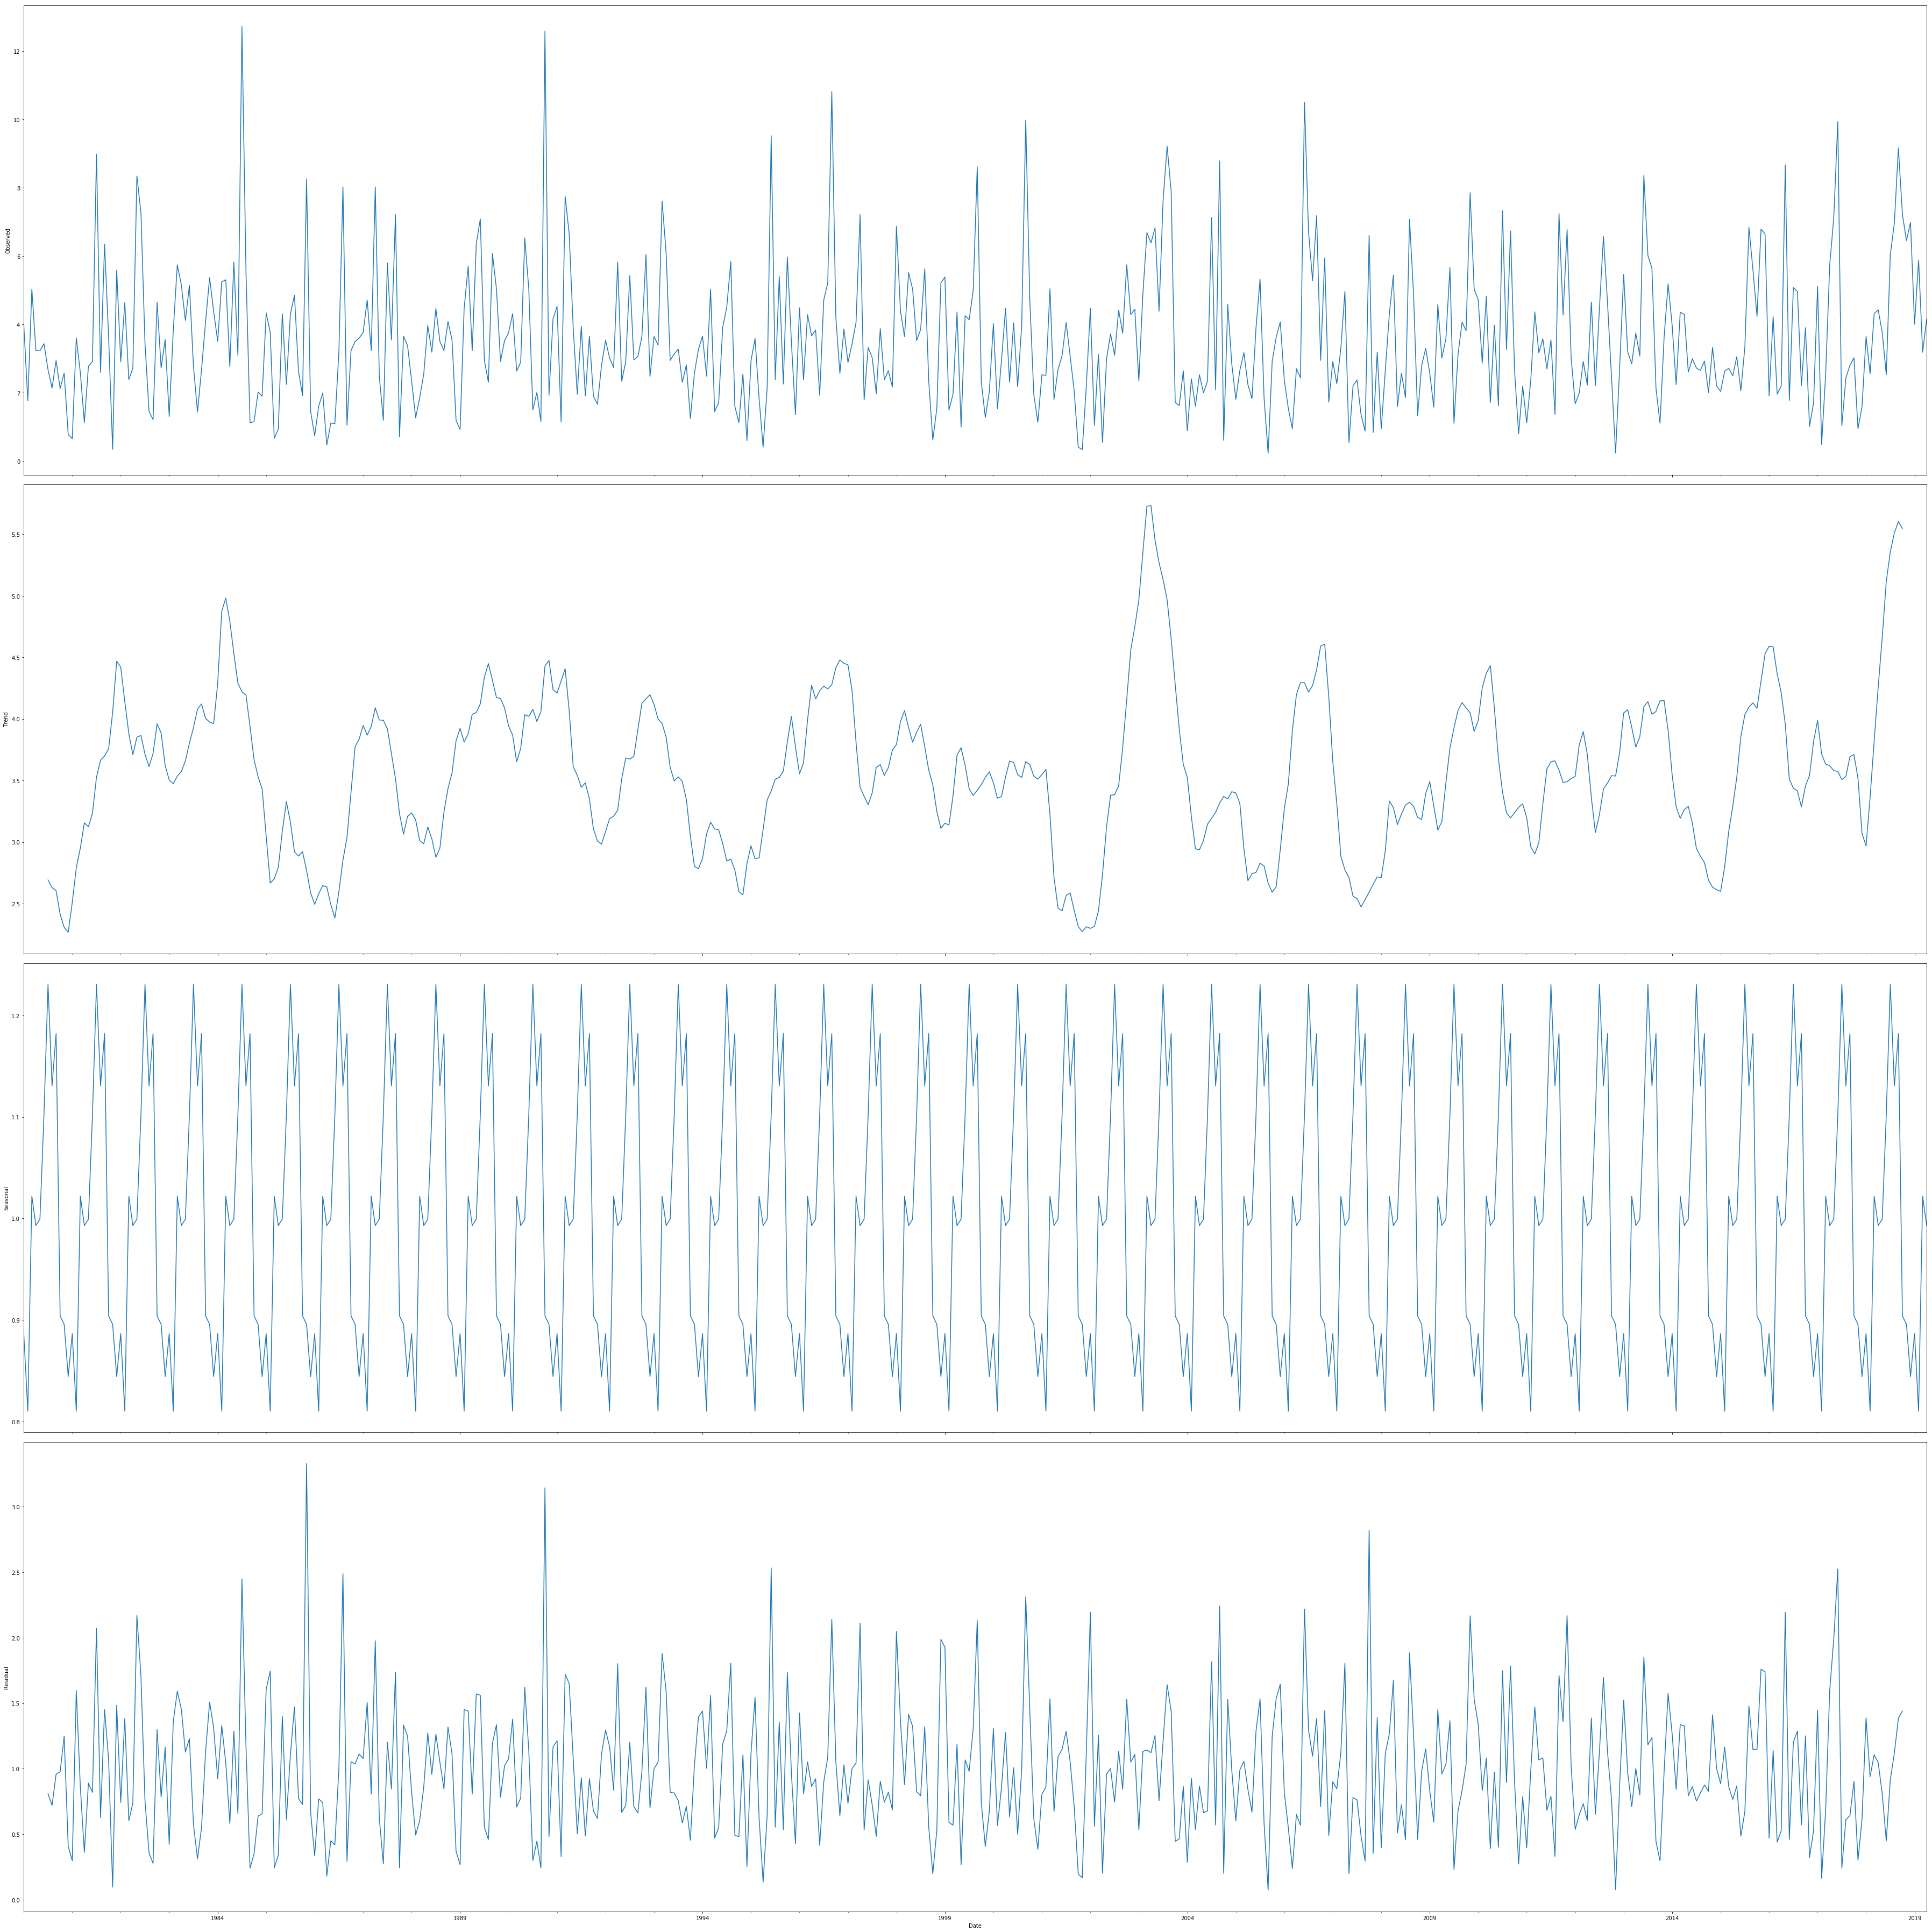

In [84]:
result = seasonal_decompose(rd['Greensboro, NC'], model='multiplicative')
result.plot()
plt.rcParams["figure.figsize"] = (50,50)
plt.savefig('seasonalitygreen.jpg')
plt.show()

In [87]:
result.seasonal.mean()

0.9993889735106515

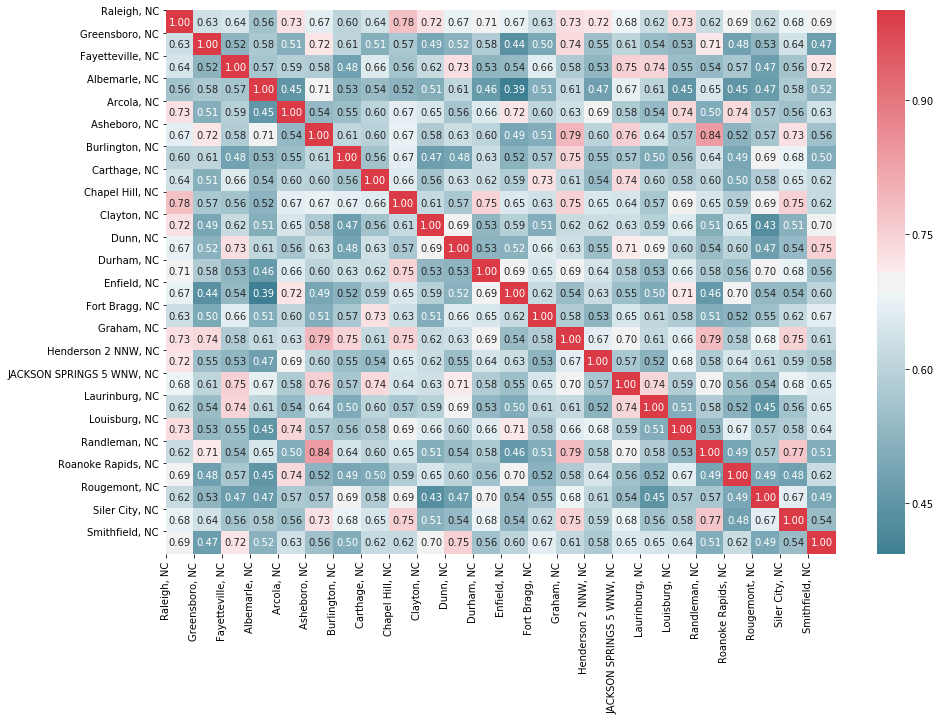

<Figure size 3600x3600 with 0 Axes>

In [71]:
#nc heatmap
rd_fr25 = rd.iloc[:,0:25]
rd_sec25 = rd.iloc[:,25:50]
rd_thr25 = rd.iloc[:,50:75]
rd_for25 = rd.iloc[:,75:100]
rd_fif25 = rd.iloc[:,100:125]
rd_six25 = rd.iloc[:,125:150]
rd_sev25 = rd.iloc[:,150:175]
rd_eig25 = rd.iloc[:,175:200]
rd_nin25 = rd.iloc[:,200:225]
rd_ten25 = rd.iloc[:,225:]

vz.get_corr_heat_map(rd_fr25, ignore_cancelled = False)
plt.savefig('nc_heatmap.jpg')

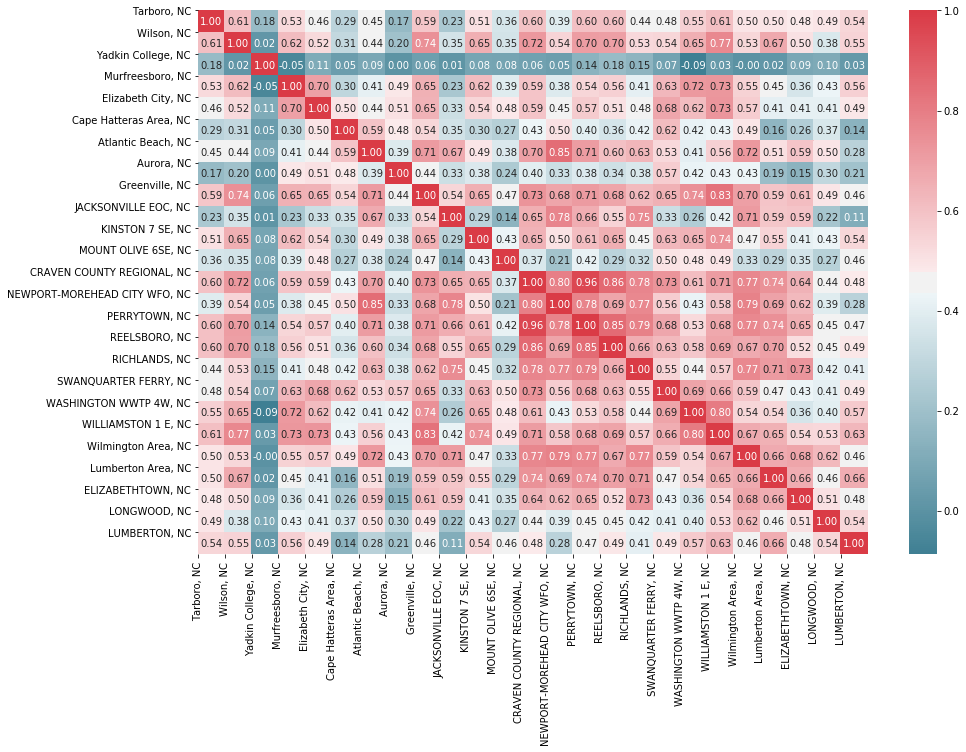

In [72]:
vz.get_corr_heat_map(rd_sec25, ignore_cancelled = False)

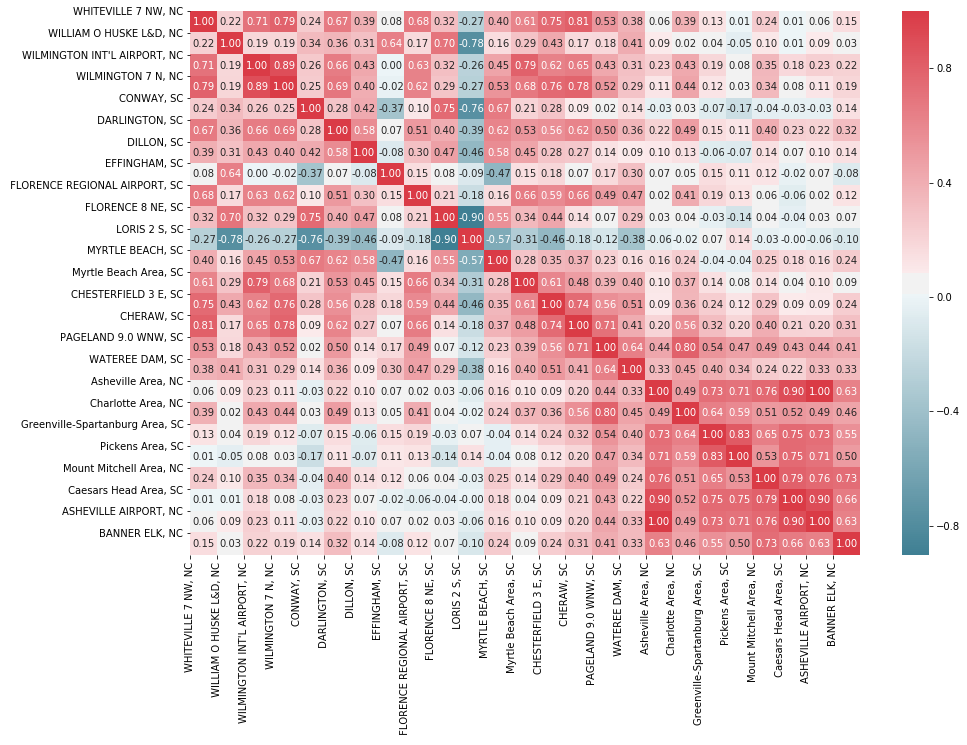

In [73]:
vz.get_corr_heat_map(rd_thr25, ignore_cancelled = False)

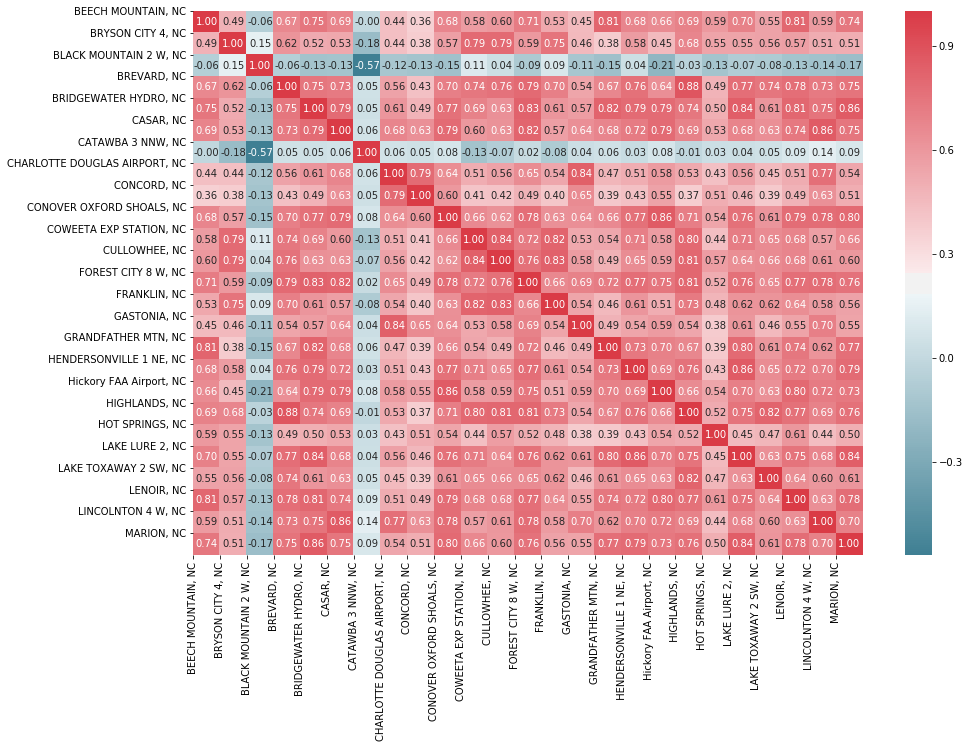

In [74]:
vz.get_corr_heat_map(rd_for25, ignore_cancelled = False)

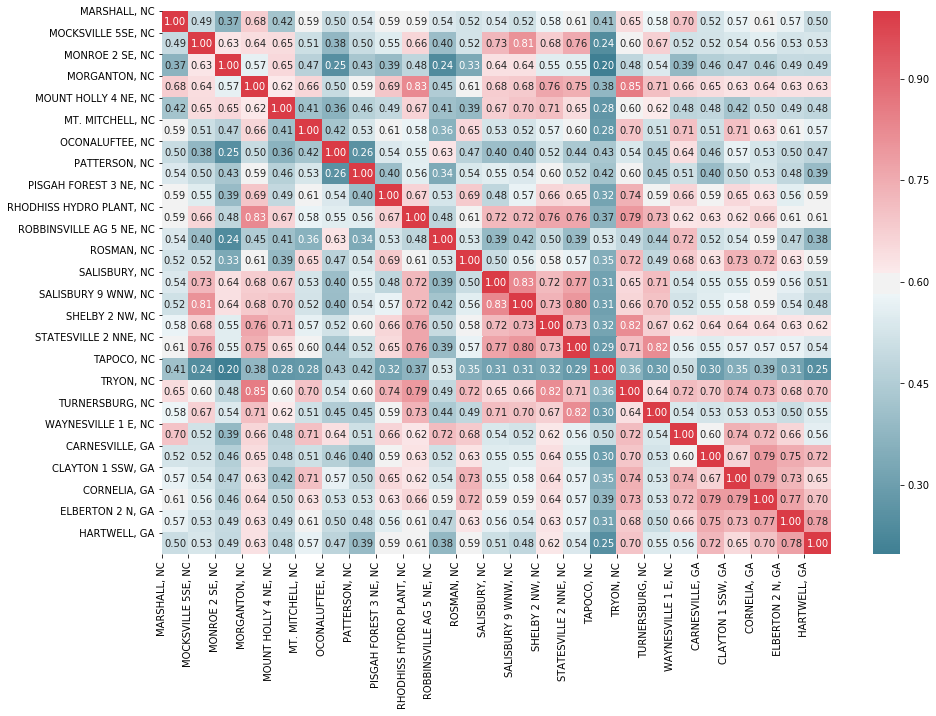

In [75]:
vz.get_corr_heat_map(rd_fif25, ignore_cancelled = False)

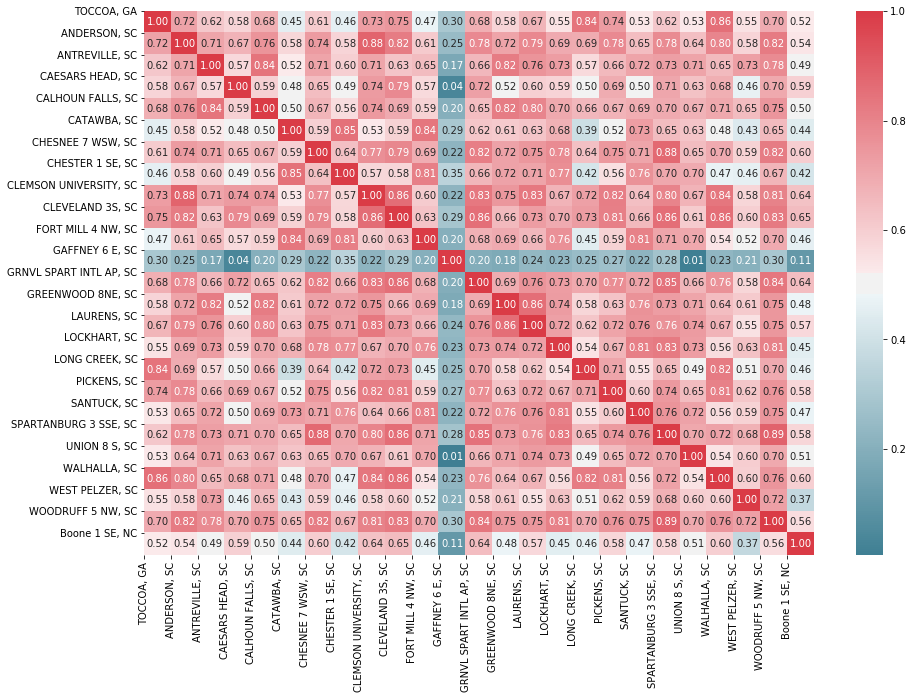

In [76]:
vz.get_corr_heat_map(rd_six25, ignore_cancelled = False)

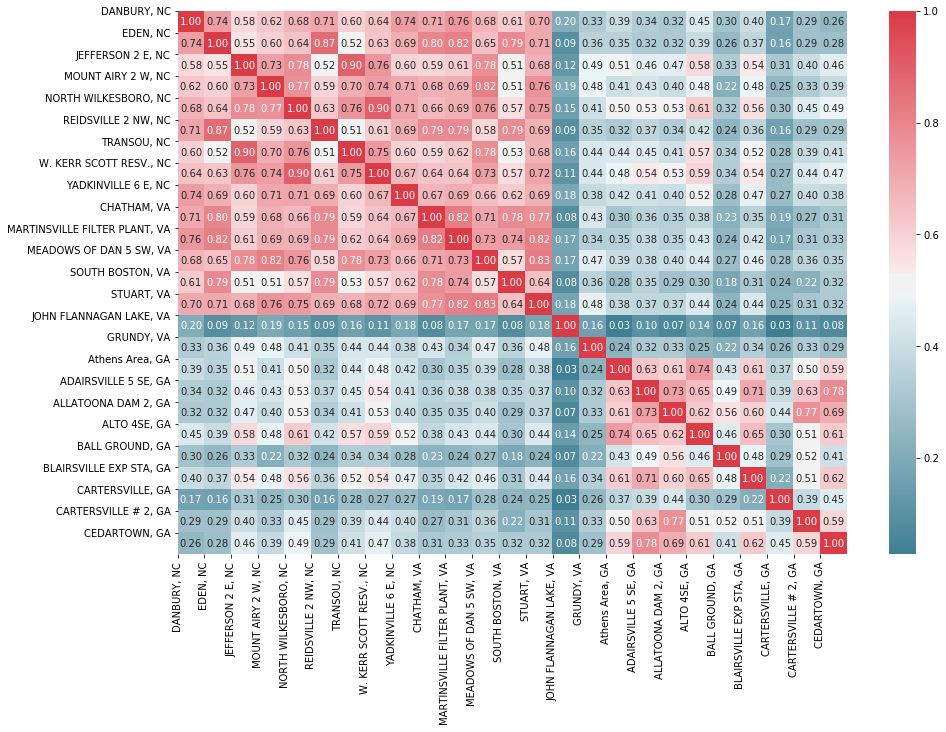

In [77]:
vz.get_corr_heat_map(rd_sev25, ignore_cancelled = False)

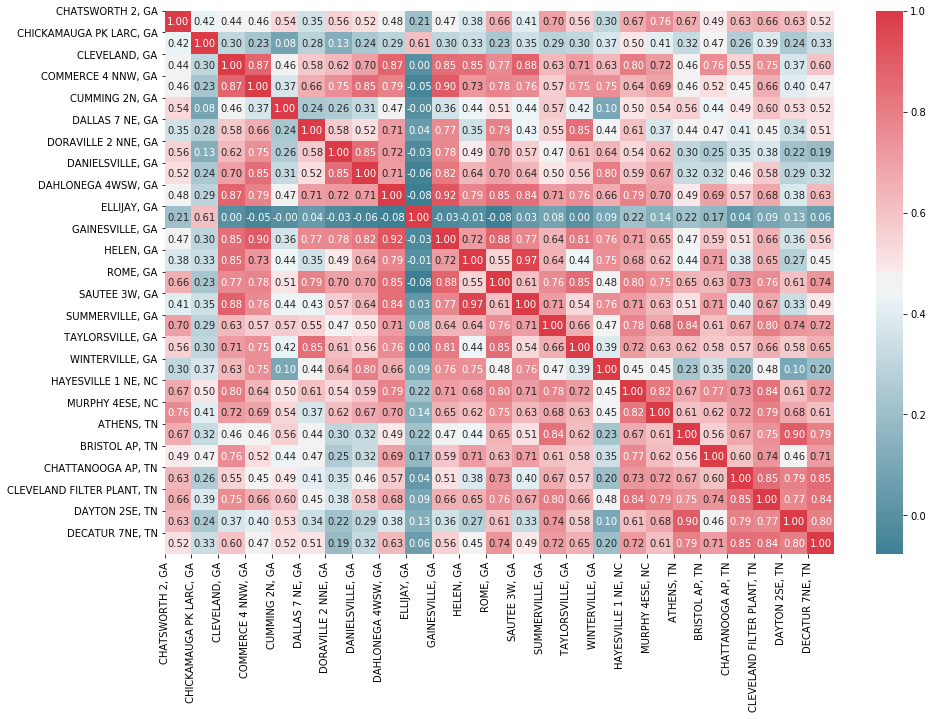

In [78]:
vz.get_corr_heat_map(rd_eig25, ignore_cancelled = False)

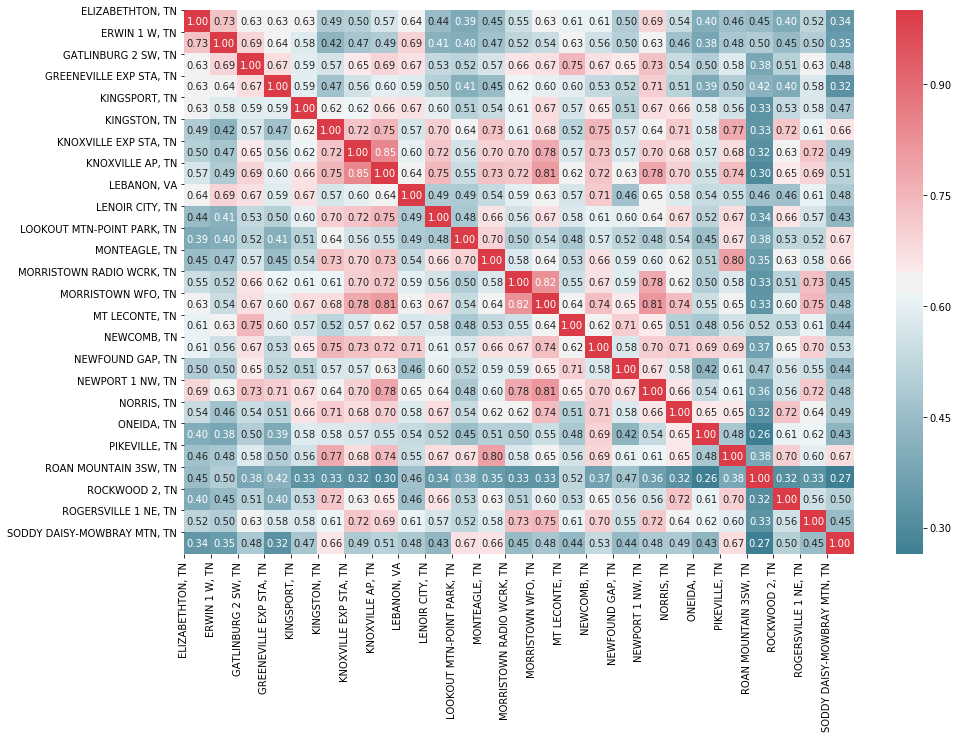

In [79]:
vz.get_corr_heat_map(rd_nin25, ignore_cancelled = False)

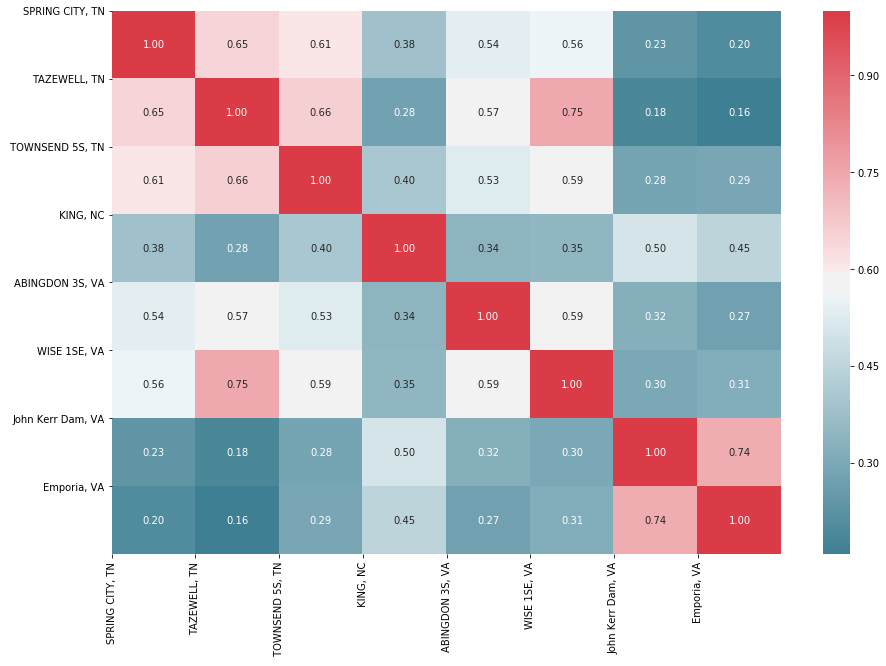

In [80]:
vz.get_corr_heat_map(rd_ten25, ignore_cancelled = False)